<h1> Data Science Salaries 2023 💸 <h1>
Víctor Fernández & Rafel Salgueiro

Link to the Kaggle dataset:

https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

# 1. Dependencies



In [ ]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import requests
import seaborn as sns
from os import sep
from google.colab import drive
!pip install kaggle
!pip install sdv
import sdv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 2. Load data

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
DATASET_PATH = '/content/drive/MyDrive/PAIA_Salaries_Dataset/ds_salaries.csv'

# 3. Define functions


In [ ]:
def split_df(df, train_pct=0.8):
    train_size = int(len(df) * train_pct)
    print('- Total size:', len(df))

    train, test = df.iloc[:train_size], df.iloc[train_size:]

    print('- Train size:', len(train))
    print('- Test size:', len(test), end='\n\n')

    print('Any omissions?', len(df) != len(train) + len(test))
    print('Any overlapping?', (train.iloc[-1] == test.iloc[0]).values[0])

    return train, test

# Data analysis

## Preliminar overview

In [ ]:
salary_raw_data = pd.read_csv(DATASET_PATH)

In [ ]:
salary_raw_data.drop_duplicates(keep='first',inplace=True)

In [ ]:
salary_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


**Numeric columns:**

work_year: Represents the work year of the employee (integer).

salary: Represents the salary of the employee (integer).

salary_in_usd: Represents the salary converted to USD (integer).

remote_ratio: Represents the ratio of remote work (integer).

**Categorical columns:**

experience_level: Represents the experience level in the job (object).

employment_type: Represents the type of employment (object).

job_title: Represents the job title or role (object).

salary_currency: Represents the currency of the salary (object).

employee_residence: Represents the employee's country of residence (object).

company_location: Represents the location of the company (object).

company_size: Represents the size of the company (object).

**The dataset does not contain any missing values (no null elements).**

In [ ]:
salary_raw_data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,2584.000000,2.584000e+03,2584.000000,2584.000000
mean,2022.301084,2.103653e+05,133409.280186,50.483746
std,0.749179,8.080375e+05,67136.837329,48.163707
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,9.000000e+04,84975.000000,0.000000
50%,2022.000000,1.346300e+05,130000.000000,50.000000
75%,2023.000000,1.825625e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [ ]:
salary_raw_data['work_year'].value_counts()

2023    1156
2022    1125
2021     228
2020      75
Name: work_year, dtype: int64

In [ ]:
salary_raw_data['experience_level'].value_counts()

SE    1554
MI     664
EN     270
EX      96
Name: experience_level, dtype: int64

In [ ]:
pd.set_option('display.max_rows', None)
salary_raw_data['employee_residence'].value_counts()

US    1893
GB     150
CA      81
IN      70
ES      47
DE      47
FR      37
PT      18
BR      18
NL      15
GR      13
AU      11
MX      10
IT       8
PK       8
JP       7
IE       7
NG       7
AT       6
AR       6
PL       6
PR       5
TR       5
BE       5
SG       5
RU       4
LV       4
UA       4
CO       4
CH       4
SI       4
BO       3
DK       3
HR       3
HU       3
RO       3
TH       3
AE       3
VN       3
HK       2
UZ       2
PH       2
CF       2
CL       2
FI       2
CZ       2
SE       2
AS       2
LT       2
GH       2
KE       2
DZ       1
NZ       1
JE       1
MY       1
MD       1
IQ       1
BG       1
LU       1
RS       1
HN       1
EE       1
TN       1
CR       1
ID       1
EG       1
DO       1
CN       1
SK       1
IR       1
MA       1
IL       1
MK       1
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, dtype: int64

Too mucho countries with less than 5 employees

In [ ]:
salary_raw_data['job_title'].value_counts()

Data Engineer                               598
Data Scientist                              538
Data Analyst                                396
Machine Learning Engineer                   206
Analytics Engineer                           91
Research Scientist                           65
Data Architect                               64
Data Science Manager                         52
ML Engineer                                  34
Research Engineer                            33
Applied Scientist                            31
Machine Learning Scientist                   26
Data Science Consultant                      23
Data Manager                                 23
Computer Vision Engineer                     18
Data Analytics Manager                       18
AI Scientist                                 16
BI Data Analyst                              15
Business Data Analyst                        15
Data Specialist                              12
Applied Machine Learning Scientist      

Too much jobs with less than 10 workers

In [ ]:
salary_raw_data['remote_ratio'].value_counts()

100    1211
0      1186
50      187
Name: remote_ratio, dtype: int64

In [ ]:
salary_raw_data['company_size'].value_counts()

M    2028
L     409
S     147
Name: company_size, dtype: int64

In [ ]:
salary_raw_data['employment_type'].value_counts()

FT    2547
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

In [ ]:
pd.set_option('display.max_rows', None)
salary_raw_data['salary'].value_counts()

100000      70
120000      59
150000      58
200000      48
80000       46
70000       42
130000      42
90000       40
50000       39
110000      39
135000      36
60000       36
160000      35
180000      31
140000      30
65000       30
75000       29
85000       28
175000      26
145000      24
170000      23
125000      21
95000       20
165000      20
115000      20
55000       19
250000      19
105000      19
40000       18
185000      17
220000      17
48000       17
45000       16
155000      16
190000      16
230000      14
30000       14
225000      14
210000      13
35000       12
20000       11
205000      10
144000      10
260000      10
128000       9
235000       9
63000        8
146000       8
72000        8
12000        8
129300       8
108000       8
300000       8
78000        8
136000       8
153000       7
154000       7
112000       7
42000        7
113000       7
134000       7
240000       7
54000        6
185900       6
275000       6
247500       6
52000     

Too much different salaries

In [ ]:
salary_raw_data['salary_in_usd'].value_counts()

100000    58
150000    56
120000    51
200000    47
130000    39
135000    36
160000    34
110000    33
140000    29
180000    28
90000     27
80000     27
175000    26
145000    24
170000    22
50000     21
125000    20
165000    20
85000     19
70000     19
75000     18
115000    18
105000    18
250000    17
220000    17
185000    17
155000    16
60000     16
190000    16
95000     16
225000    14
65000     14
230000    14
210000    12
260000    10
144000    10
205000    10
128000     9
20000      8
55000      8
61566      8
235000     8
84053      8
129300     8
146000     8
48000      8
136000     8
73546      7
113000     7
300000     7
154000     7
240000     7
134000     7
63000      7
78000      7
108000     7
30000      7
153000     7
12000      6
185900     6
112000     6
122000     6
275000     6
92350      6
168400     6
172200     6
105200     6
247500     6
31520      5
94000      5
215000     5
10000      5
152000     5
186000     5
153600     5
231250     5
52500      5

A lot of different salaries so we decide todo a range

## Complete, Correct, Create & Convert Data

*   **Creating a new feature 'salary_interval' to group discrete data in ranges.**



In [ ]:
interval = [-np.inf, 80000, 120000, 160000, 200000, 240000, 280000, 320000, 360000, np.inf]

etiqueta = ['-80k','80k-120k', '120k-160k', '160k-200k', '200k-240k', '240k-280k', '280k-320k', '320k-360k', '360k+']

salary_raw_data['salary_interval'] = pd.cut(salary_raw_data['salary_in_usd'], bins=interval, labels=etiqueta, right=False)
salary_filtered = salary_raw_data.copy()
salary_raw_data['salary_interval'].value_counts()

120k-160k    627
-80k         578
80k-120k     544
160k-200k    412
200k-240k    255
240k-280k    106
280k-320k     37
360k+         14
320k-360k     11
Name: salary_interval, dtype: int64

This variable can be useful as an alternative target variable, where instead of analyzing specific values, we can look at which income range the job would fall into.

In [ ]:
salary_raw_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_interval
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,80k-120k
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,-80k
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,-80k
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,160k-200k
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,120k-160k


We can see the new created feature "salary_interval".

*   **Deleting job titles with less than 10 samples**






In [ ]:
job_counts = salary_raw_data['job_title'].value_counts()
valid_jobs = job_counts[job_counts >= 10].index

salary_raw_data = salary_raw_data[salary_raw_data['job_title'].isin(valid_jobs)]

In [ ]:
salary_raw_data['job_title'].value_counts()

Data Engineer                               598
Data Scientist                              538
Data Analyst                                396
Machine Learning Engineer                   206
Analytics Engineer                           91
Research Scientist                           65
Data Architect                               64
Data Science Manager                         52
ML Engineer                                  34
Research Engineer                            33
Applied Scientist                            31
Machine Learning Scientist                   26
Data Manager                                 23
Data Science Consultant                      23
Data Analytics Manager                       18
Computer Vision Engineer                     18
AI Scientist                                 16
BI Data Analyst                              15
Business Data Analyst                        15
Data Specialist                              12
Applied Machine Learning Scientist      

We remove jobs with less than 10 representatives because we need a sufficient number of samples to see the average salary for that job position. In addition, jobs with very few representatives are generally very specific and not relevant for the study we want to conduct.

*   **Convert half time remote.**

In [ ]:
salary_raw_data['remote_ratio'].value_counts()

0      1118
100    1101
50      152
Name: remote_ratio, dtype: int64

In [ ]:
# Assuming salary_raw_data is your DataFrame
salary_raw_data['remote_ratio'] = salary_raw_data['remote_ratio'].replace(50, 0)

# Verify the updated value counts
print(salary_raw_data['remote_ratio'].value_counts())

0      1270
100    1101
Name: remote_ratio, dtype: int64


<ipython-input-24-8fc2cbcbfd36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_raw_data['remote_ratio'] = salary_raw_data['remote_ratio'].replace(50, 0)


In [ ]:
salary_raw_data['remote_ratio'].value_counts()

0      1270
100    1101
Name: remote_ratio, dtype: int64

*   **Creating a new feature 'job_category' to group jobs in more general categories.**

In [ ]:
# Create a mapping dictionary for job categories
job_categories = {
    'Data Engineer': [
        'Data Engineer',
        'Data Architect',
        'Data Manager',
        'ETL Developer',
        'Big Data Engineer',
        'Director of Data Science',
        'Data Operations Engineer',
        'Head of Data',
        'Data Operations Engineer',
        'Computer Vision Engineer',
        'AI Developer'
    ],
    'Data Scientist': [
        'Data Scientist',
        'Research Scientist',
        'Applied Scientist',
        'Research Engineer',
        'Data Science Manager',
        'Applied Data Scientist',
        'Applied Machine Learning Scientist',
        'AI Scientist'
    ],
    'Machine Learning Engineer': [
        'Machine Learning Engineer',
        'Machine Learning Scientist',
        'Machine Learning Infrastructure Engineer',
        'Machine Learning Software Engineer',
        'ML Engineer',
    ],
    'Data Analyst': [
        'Data Analyst',
        'Analytics Engineer',
        'Data Analytics Manager',
        'BI Data Analyst',
        'Business Data Analyst',
        'Data Specialist',
        'BI Developer'
    ],
}

# Function to classify the job titles into categories
# Create a new column 'job_category' and map job titles to categories
salary_raw_data['job_category'] = salary_raw_data['job_title'].map(
    {job: category for category, jobs in job_categories.items() for job in jobs}
)

# Print the value counts of each job category
print(salary_raw_data['job_category'].value_counts())

Data Scientist               757
Data Engineer                746
Data Analyst                 558
Machine Learning Engineer    287
Name: job_category, dtype: int64


<ipython-input-26-966b43dde2ca>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_raw_data['job_category'] = salary_raw_data['job_title'].map(


We also thought it would be interesting to try training a model with a smaller range of jobs to see what results we obtain. We created four classes: 'Data Engineer', 'Data Scientist', 'Data Analyst', and 'Machine Learning Engineer', and asked ChatGPT to classify all the jobs into these categories.

Each role has its specific focus and responsibilities within the broader field of data science, and the key difference lies in the specialized skills and areas of expertise required for each role.

**Data Engineer:** Data Engineers specialize in data infrastructure and focus on the development and maintenance of data pipelines and storage systems.

**Data Scientist:** Data Scientists are primarily focused on leveraging statistical and machine learning techniques to gain insights and solve complex business problems using data.

**Data Analysts:** Data Analysts focus on data interpretation, visualization, and providing insights for business stakeholders. Their role is centered around understanding and communicating the significance of data.

**Machine Learning Engineer:** Machine Learning Engineers have a strong emphasis on designing, implementing, and deploying machine learning models into real-world applications, with a focus on scalability and performance.



*   **For higher accuracy, countries with less than 10 samples were excluded, and the country abbreviations were replaced with their respective full names.**



In [ ]:
salary_raw_data['employee_residence'].value_counts()

US    1783
GB     134
CA      70
IN      52
ES      46
DE      39
FR      35
PT      15
BR      15
NL      13
GR      10
AU      10
MX       9
JP       7
IT       6
IE       6
PK       5
AT       5
PL       5
TR       5
PR       4
AR       4
SI       4
CO       4
BE       4
CH       4
LV       4
RO       3
BO       3
HR       3
RU       3
HU       3
UA       3
CL       2
PH       2
LT       2
NG       2
SG       2
DK       2
KE       2
TH       2
HK       2
CF       2
FI       2
SE       2
UZ       2
VN       2
AE       2
MD       1
CZ       1
BG       1
LU       1
TN       1
RS       1
DZ       1
JE       1
EE       1
MK       1
MY       1
ID       1
EG       1
DO       1
CR       1
CN       1
IR       1
MA       1
BA       1
AM       1
CY       1
KW       1
GH       1
IL       1
MT       1
Name: employee_residence, dtype: int64

In [ ]:
residence_counts = salary_raw_data['employee_residence'].value_counts()
valid_residences = residence_counts[residence_counts > 15].index

We also removed samples of workers with a country of residence that had less than 10 workers because we believe that in these isolated cases, they could be remote workers who could potentially disrupt the model since their incomes can vary significantly in such cases.

In [ ]:
country_mapping = {
    'US': 'United States',
    'GB': 'United Kingdom',
    'CA': 'Canada',
    'IN': 'India',
    'ES': 'Spain',
    'DE': 'Germany',
    'FR': 'France',
    'PT': 'Portugal',
    'BR': 'Brazil',
    'NL': 'Netherlands'
}

salary_raw_data['employee_residence'] = salary_raw_data['employee_residence'].map(country_mapping)

In [ ]:
salary_raw_data['employee_residence'].value_counts()

United States     1783
United Kingdom     134
Canada              70
India               52
Spain               46
Germany             39
France              35
Portugal            15
Brazil              15
Netherlands         13
Name: employee_residence, dtype: int64

* **Renaming categories for better understanding**

Experience Level:

In [ ]:
entry_lvl_map = {'EN': 'Entry', 'MI': 'Middle', 'SE': 'Senior', 'EX': 'Expert'}
salary_raw_data.experience_level.replace(entry_lvl_map, inplace=True)
salary_raw_data['experience_level'].value_counts()

Senior    1445
Middle     601
Entry      240
Expert      85
Name: experience_level, dtype: int64

Employment type:

In [ ]:
entry_employment_type_map = {'FT': 'Full-Time', 'PT': 'Part-Time', 'CT': 'Contract', 'FL': 'Freelance'}
salary_raw_data.employment_type.replace(entry_employment_type_map, inplace=True)
salary_raw_data['employment_type'].value_counts()

Full-Time    2344
Part-Time      14
Contract        7
Freelance       6
Name: employment_type, dtype: int64

For more acurate statistics we should only analize jobs with full-time earns.

In [ ]:
salary_raw_data = salary_raw_data[~salary_raw_data['employment_type'].isin(['Part-Time', 'Contract', 'Freelance'])]

Company Location:

In [ ]:
country_mapping = {
    'US': 'United States',
    'GB': 'United Kingdom',
    'CA': 'Canada',
    'ES': 'Spain',
    'DE': 'Germany',
    'IN': 'India',
    'FR': 'France',
    'BR': 'Brazil',
    'PT': 'Portugal',
    'NL': 'Netherlands',
    'MX': 'Mexico',
    'GR': 'Greece',
    'AU': 'Australia',
    'IE': 'Ireland',
    'PR': 'Puerto Rico',
    'LV': 'Latvia',
    'CH': 'Switzerland',
    'CO': 'Colombia',
    'FI': 'Finland',
    'SI': 'Slovenia',
    'SE': 'Sweden',
    'LT': 'Lithuania',
    'AR': 'Argentina',
    'TR': 'Turkey',
    'BE': 'Belgium',
    'UA': 'Ukraine',
    'ID': 'Indonesia',
    'AT': 'Austria',
    'EE': 'Estonia',
    'CF': 'Central African Republic',
    'TH': 'Thailand',
    'AE': 'United Arab Emirates',
    'HR': 'Croatia',
    'SG': 'Singapore',
    'LU': 'Luxembourg',
    'MY': 'Malaysia',
    'EG': 'Egypt',
    'AS': 'American Samoa',
    'HU': 'Hungary',
    'AM': 'Armenia',
    'MA': 'Morocco',
    'IT': 'Italy',
    'PK': 'Pakistan',
    'RO': 'Romania',
    'MK': 'North Macedonia',
    'KE': 'Kenya',
    'BA': 'Bosnia and Herzegovina',
    'VN': 'Vietnam',
    'RU': 'Russia',
    'IL': 'Israel',
    'HK': 'Hong Kong',
    'PL': 'Poland'
}
salary_raw_data.company_location.replace(country_mapping, inplace=True)

<ipython-input-34-256fcc169f1a>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_raw_data.company_location.replace(country_mapping, inplace=True)


# Perform Exploratory Analysis with graphics

## work_year X salary_in_usd graphic

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

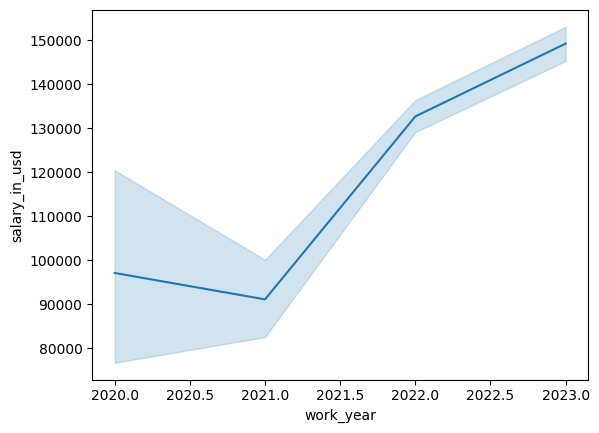

In [ ]:
import seaborn as sns

sns.lineplot(data=salary_raw_data, x="work_year", y="salary_in_usd")

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

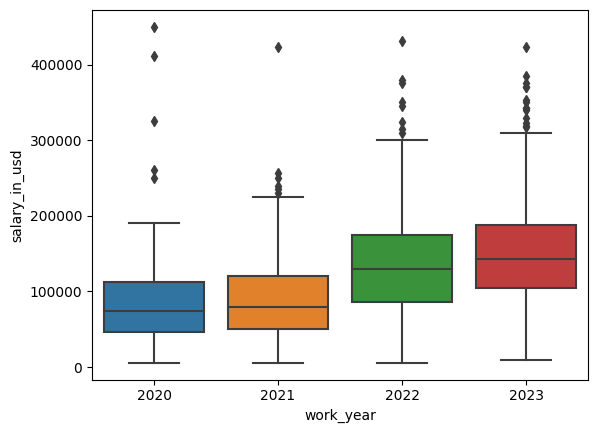

In [ ]:
sns.boxplot(x=salary_raw_data['work_year'], y=salary_raw_data['salary_in_usd'])

* **Conclusions:**

Inflation and the increasing demand for Artificial Intelligence professionals are causing salaries to rise in this sector.

There are also many outliers in the years 2022 and 2023 that we will need to analyze in more detail to understand why they appear and whether they are due to the significant salary difference between the US and the EU or just noise that needs to be removed/corrected.

To achieve greater accuracy in the salary data of our model, we should only use salaries **from the last two years**.

In [ ]:
salary_raw_data['work_year'].value_counts()
salary_raw_data = salary_raw_data[salary_raw_data['work_year'] > 2021]
salary_raw_data['work_year'].value_counts()

2023    1073
2022    1031
Name: work_year, dtype: int64

##experience_level X salary_in_usd graphic

<ipython-input-38-809e5262533f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_raw_data['experience_level'] = pd.Categorical(salary_raw_data['experience_level'], categories=order, ordered=True)


<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

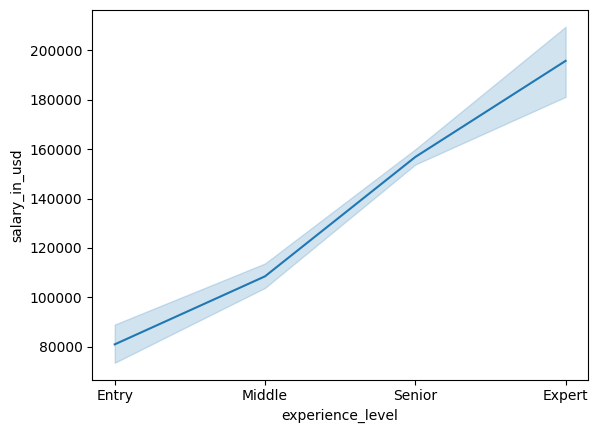

In [ ]:
order =['Entry', 'Middle', 'Senior', 'Expert']
salary_raw_data['experience_level'] = pd.Categorical(salary_raw_data['experience_level'], categories=order, ordered=True)
sns.lineplot(data=salary_raw_data, x="experience_level", y="salary_in_usd")

More experience level more salary

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

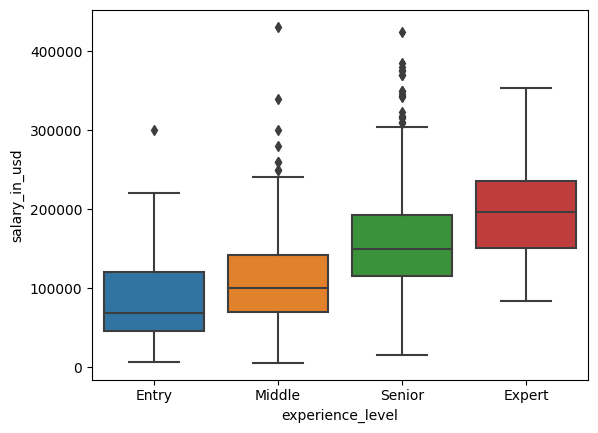

In [ ]:
sns.boxplot(x=salary_raw_data['experience_level'], y=salary_raw_data['salary_in_usd'])

* **Conclusion:**

As expected, the more experience a worker has, the better compensated they are.

This is a **important feature to take account** in our model.

##job_title X salary_in_usd graphic

<Axes: xlabel='job_title', ylabel='salary_in_usd'>

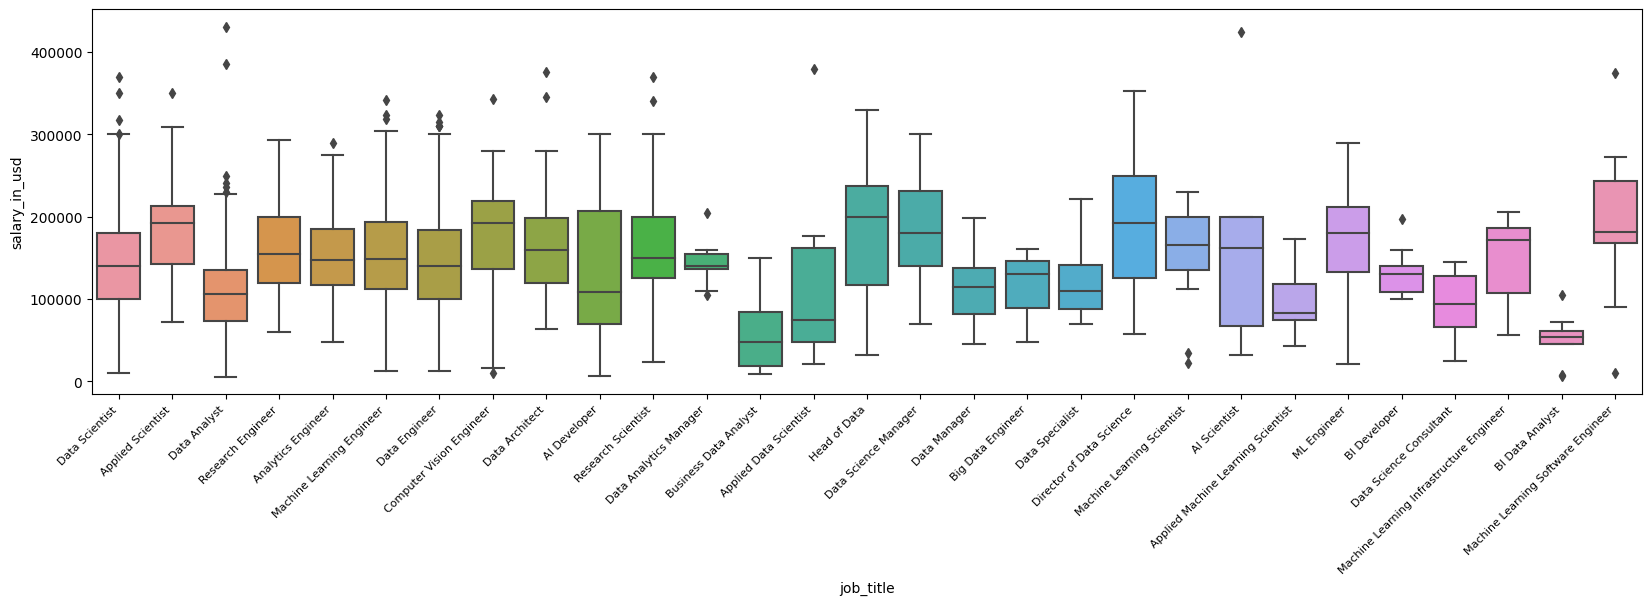

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45, ha='right', fontsize=8)
sns.boxplot(x=salary_raw_data['job_title'], y=salary_raw_data['salary_in_usd'])

##job_category X salary_in_usd graphic

<Axes: xlabel='job_category', ylabel='salary_in_usd'>

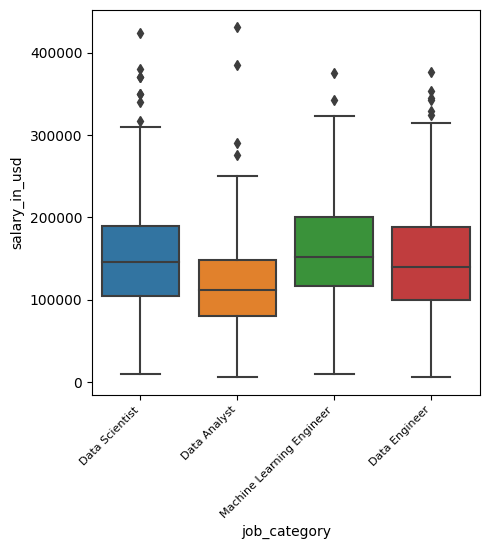

In [ ]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=45, ha='right', fontsize=8)
sns.boxplot(x=salary_raw_data['job_category'], y=salary_raw_data['salary_in_usd'])

* **Conclusion:**

When grouping jobs by their main field of study, it seems that Machine Learning Engineers have the highest salaries, closely followed by Data Engineers and Data Scientists. Data Analysts, on the other hand, rank last in terms of salary.

##employee_residence X salary_in_usd graphic

<Axes: xlabel='employee_residence', ylabel='salary_in_usd'>

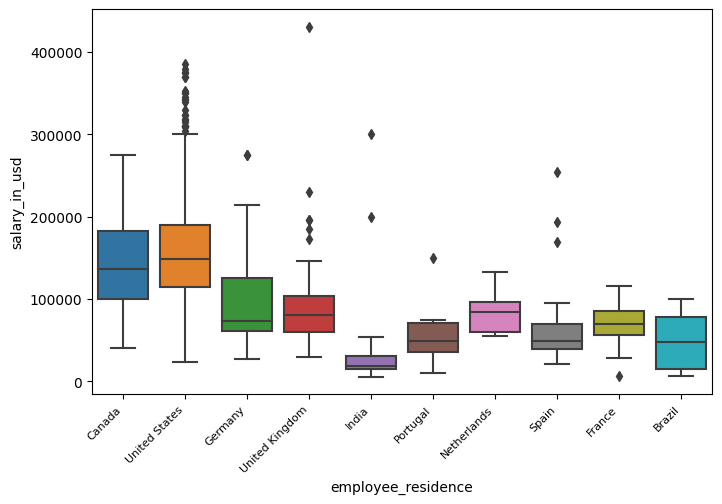

In [ ]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=45, ha='right', fontsize=8)
sns.boxplot(x=salary_raw_data['employee_residence'], y=salary_raw_data['salary_in_usd'])

* **Conclusion:**

It can be observed how salaries are dependent on the country's economy, with the highest earnings found in the United States and Canada for job positions. On the other hand, salaries in the European Union tend to be lower. It is worth noting that salaries in India are the lowest in comparison. Additionally, a significant number of outliers can be observed, originating from the United States.

Therefore, **this variable is strongly correlated** with the target variable we are analyzing.





##remote_ratio X salary_in_usd graphic

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

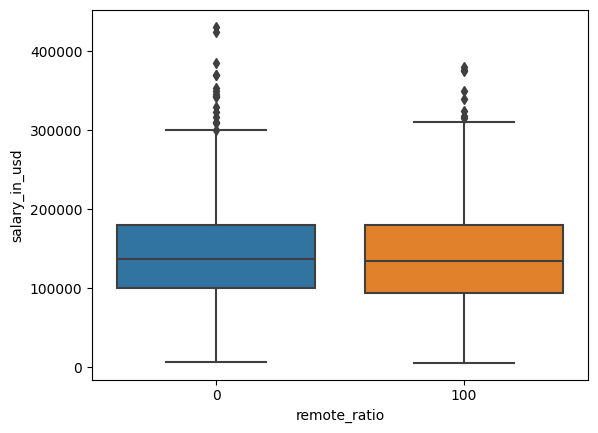

In [ ]:
sns.boxplot(x=salary_raw_data['remote_ratio'], y=salary_raw_data['salary_in_usd'])

* **Conclusion:**

Working remotely or in-person has **little to no impact** on the final salary.

##company_size X salary_in_usd graphic

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

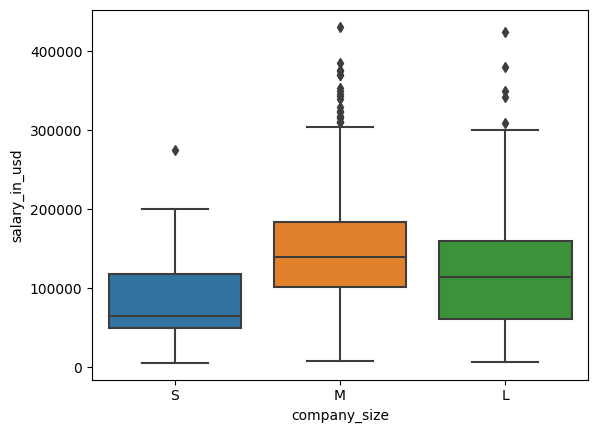

In [ ]:
order =['S', 'M', 'L']
salary_raw_data['company_size'] = pd.Categorical(salary_raw_data['company_size'], categories=order, ordered=True)
sns.boxplot(x=salary_raw_data['company_size'], y=salary_raw_data['salary_in_usd'])

* **Conclusion:**

We can see that in smaller companies, salaries tend to be lower compared to medium or large companies.

This can be **a factor to consider** when calculating the target variable.

##Analize correlation between company_location and employee_residence

In [ ]:
print(salary_raw_data.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'salary_interval',
       'job_category'],
      dtype='object')


<Figure size 1000x600 with 0 Axes>

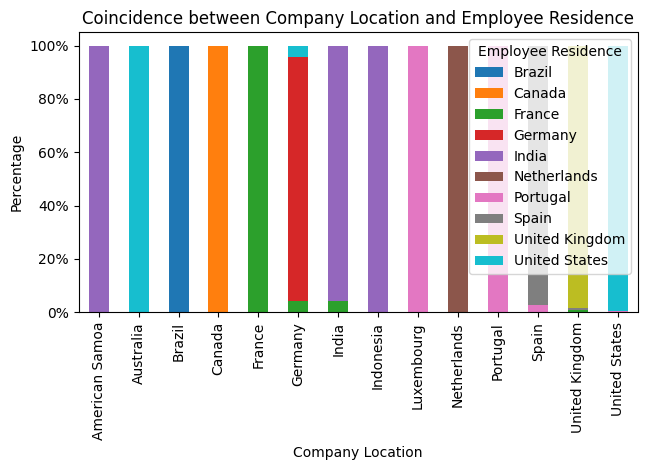

In [ ]:
from matplotlib.ticker import FuncFormatter
# Calculate the percentage of matches.
coincidence_data = pd.crosstab(salary_raw_data['company_location'], salary_raw_data['employee_residence'], normalize='index')

# Create the stacked bar chart.
plt.figure(figsize=(10, 6))
coincidence_data.plot(kind='bar', stacked=True)
plt.xlabel('Company Location')
plt.ylabel('Percentage')
plt.title('Coincidence between Company Location and Employee Residence')
plt.legend(title='Employee Residence')
plt.tight_layout()

# Adjust the y-axis to display the percentages.
formatter = FuncFormatter(lambda y, _: '{:.0%}'.format(y))
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

As we can see we have people working remotely from other countries

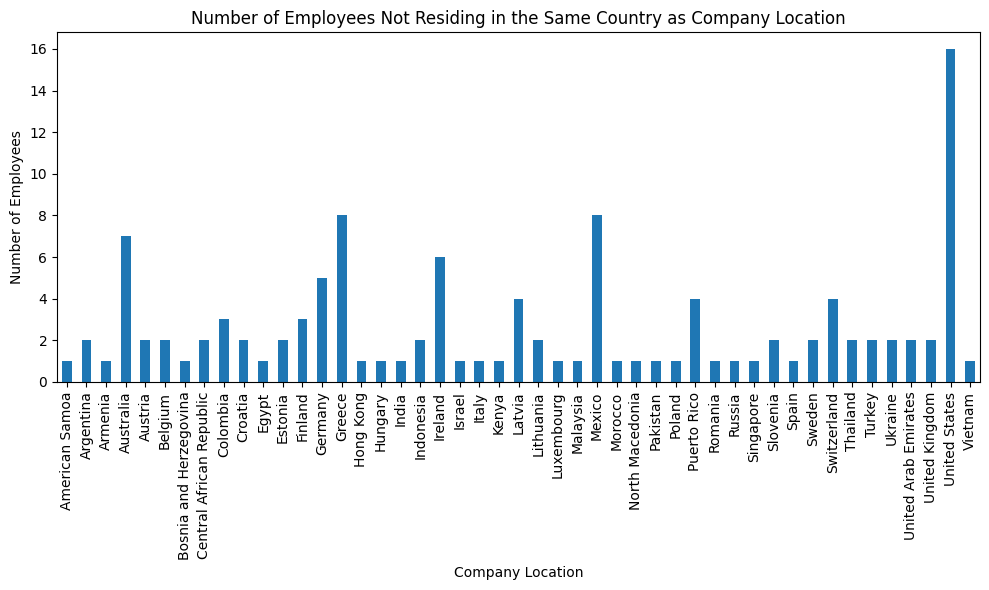

In [ ]:
# Filter employees who do not reside in the same country as the company's location.
filtered_data = salary_raw_data[salary_raw_data['company_location'] != salary_raw_data['employee_residence']]

# Group the data by company location and count the number of employees.
employee_count = filtered_data.groupby('company_location').size()

# Create the bar chart.
plt.figure(figsize=(10, 6))
employee_count.plot(kind='bar')
plt.xlabel('Company Location')
plt.ylabel('Number of Employees')
plt.title('Number of Employees Not Residing in the Same Country as Company Location')
plt.tight_layout()
plt.show()

* **Conclusion:**

As we can see, the number of workers residing in locations where the company is not located is very small and therefore negligible in the overall calculation.

Company_location and Employee_residence are two variables that are closely related, and **we can use either of them** to predict the salary that an employee will have because we assume in our model than the employee will be living in the same country as the company is located to simplify things.

#Clean data visualization

We will drop:
- work_year: As we have filtered the last two years to compute statistics.
- salary: As can be unacurate by the currency of each country. Instead we will use salary_in_usd to unify in one currency.
- salary_currency: For the same reason above.
- employment_type: As we have filtered Full-Time jobs to compute statistics.
- remote_ratio: As we saw it has no impact on the objective variable.
- company_location: As we will use employee_residence as a indicative of how much will earn the worker.

In [ ]:
salary_raw_data = salary_raw_data.drop(['work_year', 'salary', 'salary_currency', 'employment_type', 'remote_ratio', 'company_location'], axis=1)

In [ ]:
salary_raw_data.head()

,experience_level,job_title,salary_in_usd,employee_residence,company_size,salary_interval,job_category
3,Senior,Data Scientist,175000,Canada,M,160k-200k,Data Scientist
4,Senior,Data Scientist,120000,Canada,M,120k-160k,Data Scientist
5,Senior,Applied Scientist,222200,United States,L,200k-240k,Data Scientist
6,Senior,Applied Scientist,136000,United States,L,120k-160k,Data Scientist
7,Senior,Data Scientist,219000,Canada,M,200k-240k,Data Scientist


In [ ]:
#Convert categorical data to numerical data:
salary_raw_data['experience_level']=salary_raw_data['experience_level'].astype('category').cat.codes
salary_raw_data['job_title']=salary_raw_data['job_title'].astype('category').cat.codes
salary_raw_data['employee_residence']=salary_raw_data['employee_residence'].astype('category').cat.codes
salary_raw_data['company_size']=salary_raw_data['company_size'].astype('category').cat.codes
salary_raw_data['salary_interval']=salary_raw_data['salary_interval'].astype('category').cat.codes
salary_raw_data['job_category']=salary_raw_data['job_category'].astype('category').cat.codes
salary_raw_data.head()

,experience_level,job_title,salary_in_usd,employee_residence,company_size,salary_interval,job_category
3,2,18,175000,1,1,3,2
4,2,18,120000,1,1,2,2
5,2,5,222200,9,2,4,2
6,2,5,136000,9,2,2,2
7,2,18,219000,1,1,4,2


# First model (Linear regression) - Regression problem

**Objective variable:** salary_in_usd.

**Model features:** experience_level, job_tittle, employee_residence, company_size

**ML model used**: Linear Regression is a widely used statistical modeling technique for predicting a continuous target variable based on one or more predictor variables. **Why we have use it?** For its Simplicity and as a Benchmark model: Linear Regression serves as a baseline model for regression problems. By establishing a benchmark, we can compare the performance of more sophisticated models against it.

**Performance evaluation**:Not performing as expected as it's giving us an score of 0.272 which should be better.




---

Imports

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

Data


*Split test/train data*

In [ ]:
x = salary_raw_data[['experience_level', 'job_category', 'employee_residence', 'company_size']]
y = salary_raw_data['salary_in_usd']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)


Model

In [ ]:
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
y_pred = lr.predict(x_test)

lr1 = r2_score(y_test, y_pred)
print(lr1)

0.2723491477744424


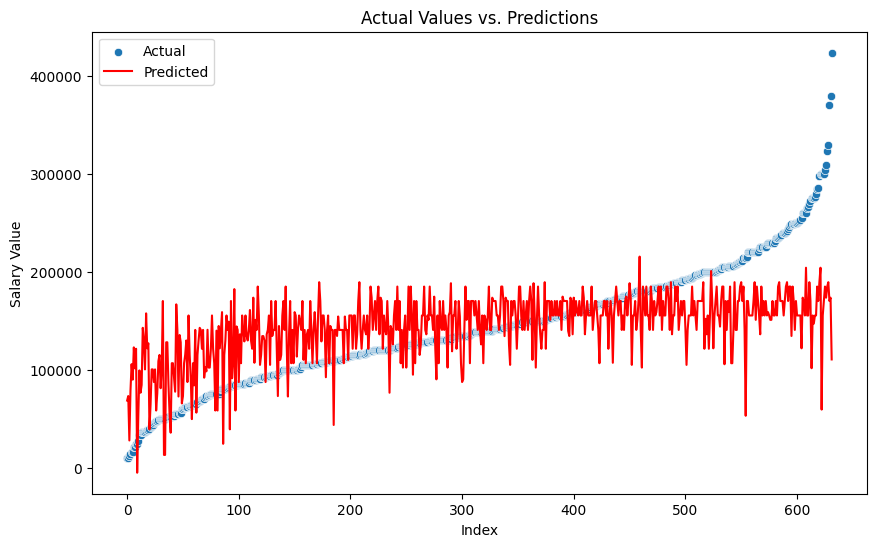

In [ ]:
# Create a DataFrame with the actual values and predictions
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Sort the values by 'Actual' for a clearer representation of the regression line
results = results.sort_values(by='Actual').reset_index(drop=True)

# Create a range of values for the regression line
x_range = np.arange(len(results))

# Plot the actual values and predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_range, y=results['Actual'], label='Actual')
sns.lineplot(x=x_range, y=results['Predicted'], color='red', label='Predicted')

plt.xlabel('Index')
plt.ylabel('Salary Value')
plt.title('Actual Values vs. Predictions')
plt.legend()
plt.show()

# Second model (Decission Tree)

**Objective variable**: salary_interval.

**Model features**: experience_level, job_tittle, employee_residence, company_size

**ML model used**: Decision Tree is a non-parametric supervised learning algorithm that can be used for both regression and classification tasks. In this case, the DecisionTreeRegressor variant is used for a regression problem.

**We have chose it?**:
- Non-linearity: Decision Tree can capture non-linear relationships between the predictor variables and the target variable. It is capable of modeling complex decision boundaries that may not be easily represented by linear models.

- Control over complexity: The maximum depth parameter (set to 5 in this case) allows controlling the complexity of the tree. By limiting the depth, we can prevent overfitting and improve generalization.

**Performance evaluation**:The best performance obtained is 0.32 which is an improvement of linear regression.

---



In [ ]:

dtr1 = DecisionTreeRegressor(max_depth=2, random_state=0)
dtr2 = DecisionTreeRegressor(max_depth=5, random_state=0)
dtr3 = DecisionTreeRegressor(max_depth=10, random_state=0)
dtr4 = DecisionTreeRegressor(max_depth=25, random_state=0)
dtr5 = DecisionTreeRegressor(max_depth=10000, random_state=0)
dtr1.fit(x_train, y_train)
dtr2.fit(x_train, y_train)
dtr3.fit(x_train, y_train)
dtr4.fit(x_train, y_train)
dtr5.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10000, random_state=0)

<h3>Acuracy <h3/>

In [ ]:
y_predict1 = dtr1.predict(x_test)
y_predict2 = dtr2.predict(x_test)
y_predict3 = dtr3.predict(x_test)
y_predict4 = dtr4.predict(x_test)
y_predict5 = dtr5.predict(x_test)
r1 = r2_score(y_test, y_predict1)
r2 = r2_score(y_test, y_predict2)
r3 = r2_score(y_test, y_predict3)
r4 = r2_score(y_test, y_predict4)
r5 = r2_score(y_test, y_predict5)
print("dtr1: " + str(r1) + " dtr2: "+ str(r2) + " dtr3: " + str(r3) + " dtr4: " + str(r4) + " dtr5: " + str(r5))

dtr1: 0.25966752270810245 dtr2: 0.3295414201872643 dtr3: 0.3255715806834597 dtr4: 0.3253241704072043 dtr5: 0.3253241704072043


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_predict2)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_predict2)
print("R^2 Score:", r2)

Mean Squared Error: 2564457367.37429
R^2 Score: 0.3295414201872643


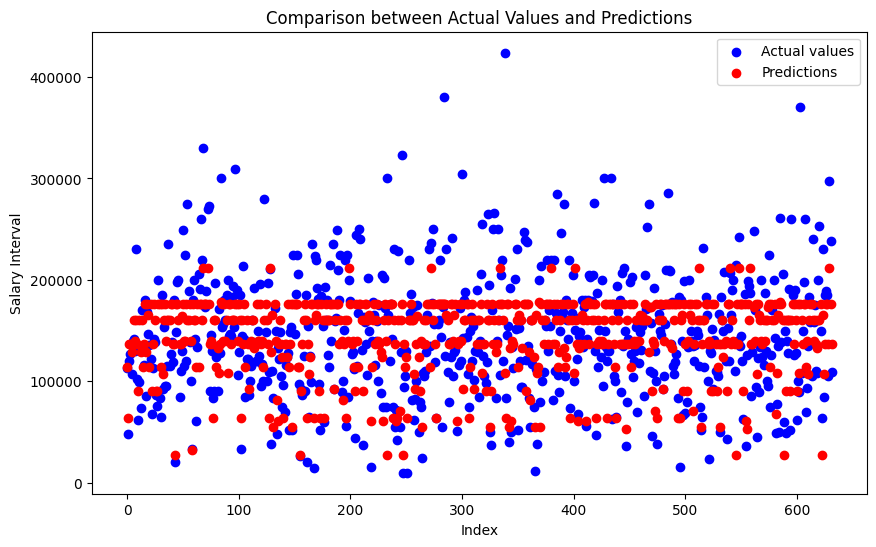

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='b', label='Actual values')
plt.scatter(range(len(y_test)), y_predict2, color='r', label='Predictions')
plt.xlabel('Index')
plt.ylabel('Salary Interval')
plt.title('Comparison between Actual Values and Predictions')
plt.legend()
plt.show()

# Third model (Random Forest)

**Objective variable**: salary_in_usd.

**Model features**: experience_level, job_tittle, employee_residence, company_size

**ML model used**: Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It is widely used for both regression and classification tasks.

By using GridSearchCV, we can automatically search for the best combination of hyperparameters based on the specified scoring metric (neg_root_mean_squared_error in this case), which helps in optimizing the performance of the model.


**We have chose it?**:
- Robustness to overfitting: Random Forest helps mitigate overfitting by combining multiple decision trees.

- Feature importance: Random Forest provides a measure of feature importance, indicating the relative importance of each predictor variable in making predictions


**Performance evaluation**: We use the variable score to see the overall performance. In this case it scores: 0.3104 which is 1 tenth below the decission tree.


---



In [ ]:
#Data to test
x = salary_raw_data[['experience_level', 'job_category', 'employee_residence', 'company_size']]

#Objective data
y = salary_raw_data['salary_interval']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

Tunning model

In [ ]:
rf_params = {
   "n_estimators" : [50, 100, 200, 500],
   "max_depth" : [5, 10, 50],
   "random_state" : [1, 2, 5, 10]
}

In [ ]:
gs = GridSearchCV(estimator=RandomForestRegressor(), param_grid=rf_params, scoring='neg_root_mean_squared_error', verbose=3)
gs.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END max_depth=5, n_estimators=50, random_state=1;, score=-1.441 total time=   0.2s
[CV 2/5] END max_depth=5, n_estimators=50, random_state=1;, score=-1.240 total time=   0.2s
[CV 3/5] END max_depth=5, n_estimators=50, random_state=1;, score=-1.306 total time=   0.2s
[CV 4/5] END max_depth=5, n_estimators=50, random_state=1;, score=-1.362 total time=   0.2s
[CV 5/5] END max_depth=5, n_estimators=50, random_state=1;, score=-1.251 total time=   0.2s
[CV 1/5] END max_depth=5, n_estimators=50, random_state=2;, score=-1.443 total time=   0.2s
[CV 2/5] END max_depth=5, n_estimators=50, random_state=2;, score=-1.232 total time=   0.2s
[CV 3/5] END max_depth=5, n_estimators=50, random_state=2;, score=-1.308 total time=   0.2s
[CV 4/5] END max_depth=5, n_estimators=50, random_state=2;, score=-1.359 total time=   0.2s
[CV 5/5] END max_depth=5, n_estimators=50, random_state=2;, score=-1.249 total time=   0.1s
[CV 1/5] END max_d

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 50],
                         'n_estimators': [50, 100, 200, 500],
                         'random_state': [1, 2, 5, 10]},
             scoring='neg_root_mean_squared_error', verbose=3)

In [ ]:
gs.best_estimator_

RandomForestRegressor(max_depth=5, n_estimators=50, random_state=5)

In [ ]:
y_predicted = gs.best_estimator_.predict(x_test)
r2 = r2_score(y_test, y_predicted)
r2

0.31046688867357686

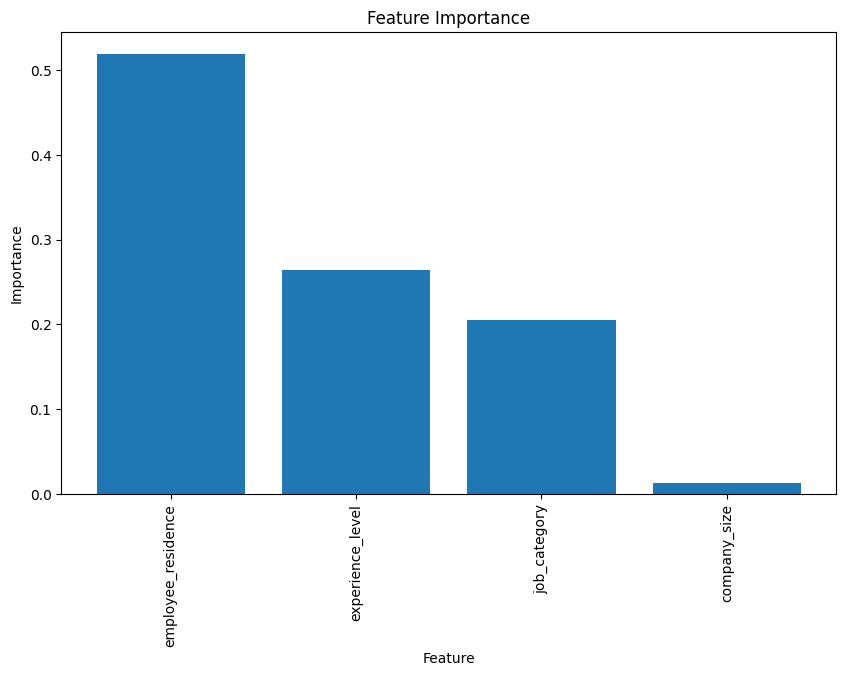

In [ ]:
# Get feature importance
importances = gs.best_estimator_.feature_importances_
feature_names = x_train.columns

# Sort features by their importance from highest to lowest
indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
rmse = math.sqrt(mse)

print("Mean Absolute Percentage Error (MAPE):", 1-mae)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Percentage Error (MAPE): 0.055489189780935755
Mean Squared Error (MSE): 1.56622678836138


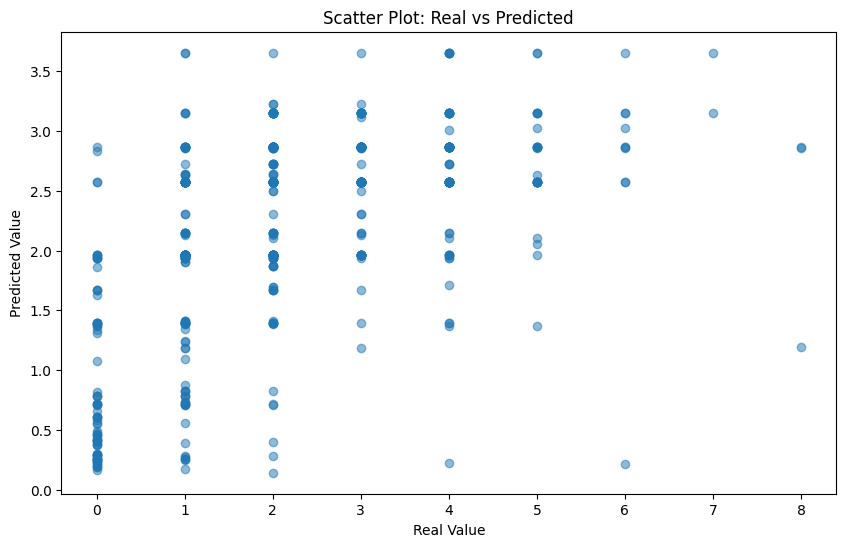

In [ ]:
# Graficar los valores reales frente a las predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predicted, alpha=0.5)
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot: Real vs Predicted')
plt.show()

# Data augmentation

GAN model

In [ ]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()

In [ ]:
metadata.detect_from_dataframe(data=salary_raw_data)

In [ ]:
print(metadata)

{
    "columns": {
        "experience_level": {
            "sdtype": "numerical"
        },
        "job_title": {
            "sdtype": "numerical"
        },
        "salary_in_usd": {
            "sdtype": "numerical"
        },
        "employee_residence": {
            "sdtype": "numerical"
        },
        "company_size": {
            "sdtype": "numerical"
        },
        "salary_interval": {
            "sdtype": "numerical"
        },
        "job_category": {
            "sdtype": "numerical"
        }
    },
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1"
}


In [ ]:
metadata.validate()

In [ ]:
from sdv.single_table.ctgan import CTGANSynthesizer
!pip uninstall -y numpy

!pip install numpy==1.23.3
import numpy

Found existing installation: numpy 1.23.3
Uninstalling numpy-1.23.3:
  Successfully uninstalled numpy-1.23.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.23.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)


In [ ]:
synthesizer = CTGANSynthesizer(metadata, verbose=True)
synthesizer.fit(salary_raw_data)

/usr/local/lib/python3.10/dist-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f331259cb80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 842, in __init__
    super().__init__(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 810, in __init__
    self._dynl

Epoch 1, Loss G:  0.0233,Loss D:  0.0078
Epoch 2, Loss G: -0.0149,Loss D: -0.0557
Epoch 3, Loss G: -0.0739,Loss D: -0.0411
Epoch 4, Loss G: -0.1831,Loss D: -0.0818
Epoch 5, Loss G: -0.3341,Loss D: -0.1254
Epoch 6, Loss G: -0.4542,Loss D: -0.0782
Epoch 7, Loss G: -0.5319,Loss D: -0.1434
Epoch 8, Loss G: -0.7239,Loss D: -0.1105
Epoch 9, Loss G: -0.8771,Loss D: -0.0902
Epoch 10, Loss G: -0.9472,Loss D:  0.0707
Epoch 11, Loss G: -0.9829,Loss D:  0.1170
Epoch 12, Loss G: -1.0256,Loss D: -0.0487
Epoch 13, Loss G: -0.9107,Loss D:  0.0370
Epoch 14, Loss G: -0.7955,Loss D: -0.1055
Epoch 15, Loss G: -0.7925,Loss D: -0.1318
Epoch 16, Loss G: -0.6306,Loss D: -0.1208
Epoch 17, Loss G: -0.6349,Loss D: -0.1095
Epoch 18, Loss G: -0.6121,Loss D: -0.0003
Epoch 19, Loss G: -0.6521,Loss D: -0.0023
Epoch 20, Loss G: -0.5994,Loss D:  0.0105
Epoch 21, Loss G: -0.6504,Loss D:  0.1393
Epoch 22, Loss G: -0.6765,Loss D: -0.0162
Epoch 23, Loss G: -0.5581,Loss D:  0.1408
Epoch 24, Loss G: -0.6175,Loss D: -0.0125
E

**Syntetic data generation**

In [ ]:
samples = synthesizer.sample(500)

In [ ]:
samples

,experience_level,job_title,salary_in_usd,employee_residence,company_size,salary_interval,job_category
0,2,22,231616,9,1,2,1
1,2,8,83423,9,1,5,0
2,2,12,178960,9,1,3,0
3,2,18,216918,9,1,0,1
4,2,23,235251,9,1,0,1
5,2,14,185991,9,1,6,0
6,2,17,146679,9,1,1,1
7,2,14,227491,9,1,1,0
8,1,18,147891,9,0,0,1
9,2,23,236512,9,1,2,1


Adding syntetic data

In [ ]:
full_df = pd.concat([salary_raw_data, samples], axis=0, ignore_index=True)

In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2604 entries, 0 to 2603
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   experience_level    2604 non-null   int8 
 1   job_title           2604 non-null   int8 
 2   salary_in_usd       2604 non-null   int64
 3   employee_residence  2604 non-null   int8 
 4   company_size        2604 non-null   int8 
 5   salary_interval     2604 non-null   int8 
 6   job_category        2604 non-null   int8 
dtypes: int64(1), int8(6)
memory usage: 35.7 KB


# Third model (Random Forest) with syntetic data

**Objective variable**: salary_in_usd.

**Model features**: experience_level, job_tittle, employee_residence, company_size

**ML model used**: Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It is widely used for both regression and classification tasks.

By using GridSearchCV, we can automatically search for the best combination of hyperparameters based on the specified scoring metric (neg_root_mean_squared_error in this case), which helps in optimizing the performance of the model.


**We have chose it?**:
- Robustness to overfitting: Random Forest helps mitigate overfitting by combining multiple decision trees.

- Feature importance: Random Forest provides a measure of feature importance, indicating the relative importance of each predictor variable in making predictions


**Performance evaluation**: We use the variable score to see the overall performance. In this case it scores: 0.3104 which is 1 tenth below the decission tree.


---



In [ ]:
#Data to test
x = full_df[['experience_level', 'job_category', 'employee_residence', 'company_size']]

#Objective data
y = full_df['salary_interval']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [ ]:
rf_params = {
   "n_estimators" : [50, 100, 200, 500],
   "max_depth" : [5, 10, 50],
   "random_state" : [1, 2, 5, 10]
}

In [ ]:
gs = GridSearchCV(estimator=RandomForestRegressor(), param_grid=rf_params, scoring='neg_root_mean_squared_error', verbose=3)
gs.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END max_depth=5, n_estimators=50, random_state=1;, score=-1.396 total time=   0.1s
[CV 2/5] END max_depth=5, n_estimators=50, random_state=1;, score=-1.347 total time=   0.1s
[CV 3/5] END max_depth=5, n_estimators=50, random_state=1;, score=-1.380 total time=   0.1s
[CV 4/5] END max_depth=5, n_estimators=50, random_state=1;, score=-1.387 total time=   0.1s
[CV 5/5] END max_depth=5, n_estimators=50, random_state=1;, score=-1.392 total time=   0.1s
[CV 1/5] END max_depth=5, n_estimators=50, random_state=2;, score=-1.395 total time=   0.1s
[CV 2/5] END max_depth=5, n_estimators=50, random_state=2;, score=-1.335 total time=   0.1s
[CV 3/5] END max_depth=5, n_estimators=50, random_state=2;, score=-1.383 total time=   0.1s
[CV 4/5] END max_depth=5, n_estimators=50, random_state=2;, score=-1.384 total time=   0.1s
[CV 5/5] END max_depth=5, n_estimators=50, random_state=2;, score=-1.391 total time=   0.1s
[CV 1/5] END max_d

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 50],
                         'n_estimators': [50, 100, 200, 500],
                         'random_state': [1, 2, 5, 10]},
             scoring='neg_root_mean_squared_error', verbose=3)

In [ ]:
gs.best_estimator_

RandomForestRegressor(max_depth=5, random_state=10)

In [ ]:
y_predicted = gs.best_estimator_.predict(x_test)
r2 = r2_score(y_test, y_predicted)
r2

0.11786549722413475

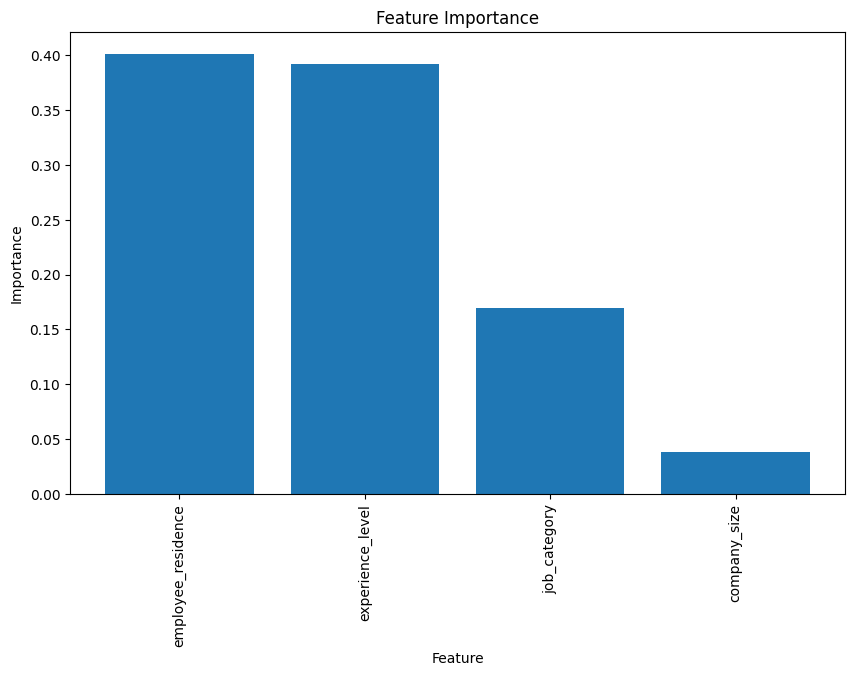

In [ ]:
# Get feature importance
importances = gs.best_estimator_.feature_importances_
feature_names = x_train.columns

# Sort features by their importance from highest to lowest
indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
rmse = math.sqrt(mse)

print("Mean Absolute Percentage Error (MAPE):", 1-mae)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Percentage Error (MAPE): -0.105067237391411
Mean Squared Error (MSE): 2.110063699574237


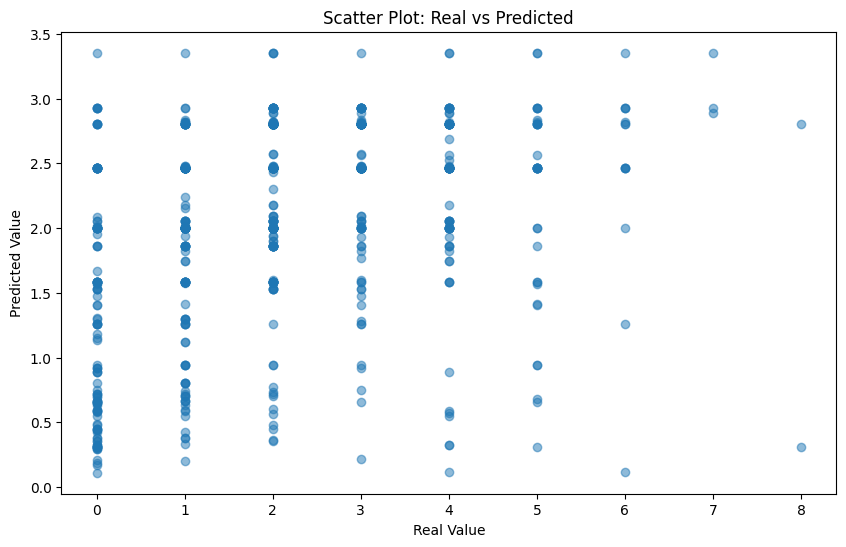

In [ ]:
# Graficar los valores reales frente a las predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predicted, alpha=0.5)
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot: Real vs Predicted')
plt.show()

# Conclusion

The DecisionTreeRegressor model performs the best with a prediction accuracy of 32.9%, which is considered realy good because we are predicting the future. The final results might be influenced by external variables that we have no control over. Moreover, there is significant variability in salaries across different countries, adding further noise to the analysis. With the syntetic data added we can see that the experience level has gained more importance but the prediction is much worse, we think that this happens because the data is worst too.